In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot: >

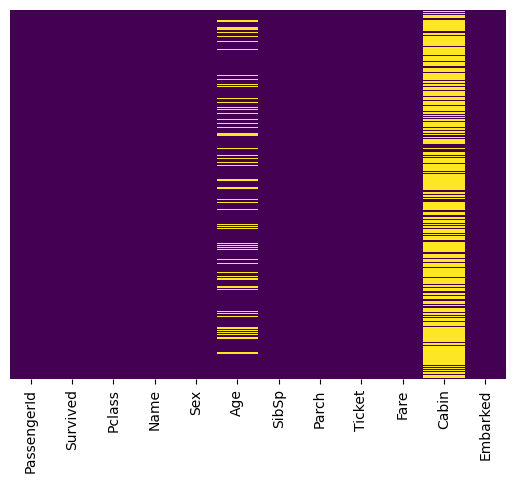

In [8]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')
#Yellow - True (Null)
#Purple - False

In [9]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='count'>

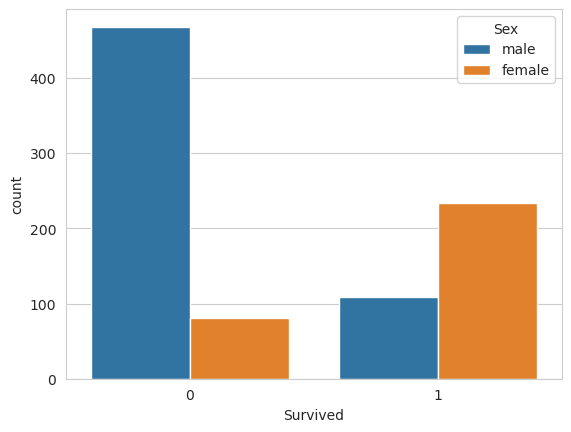

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train)

<AxesSubplot: xlabel='Survived', ylabel='count'>

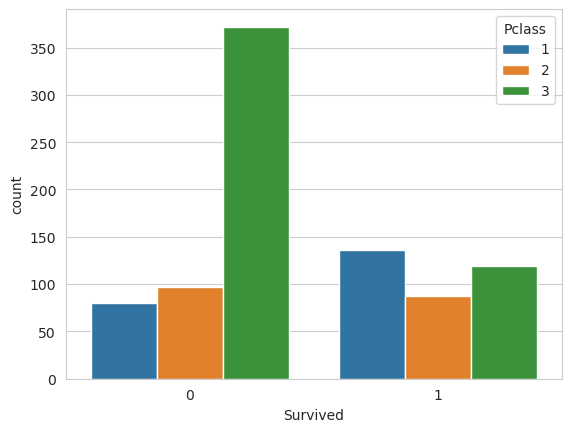

In [11]:
sns.countplot(x='Survived', hue='Pclass', data=train)

<AxesSubplot: xlabel='Age', ylabel='Count'>

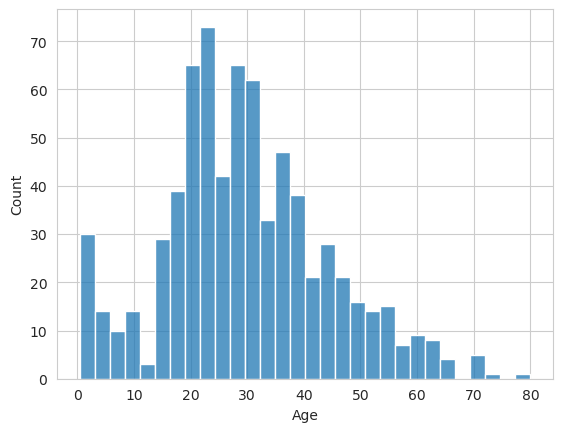

In [12]:
sns.histplot(train['Age'].dropna(), bins = 30)

<AxesSubplot: xlabel='Age', ylabel='Count'>

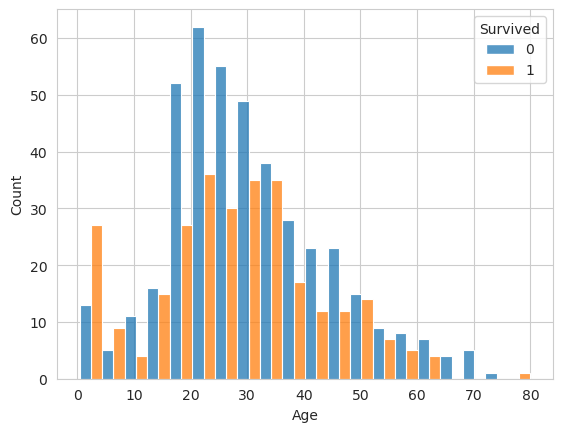

In [13]:
sns.histplot(x='Age', data=train, hue='Survived', multiple='dodge', thresh=5)

<AxesSubplot: xlabel='SibSp', ylabel='count'>

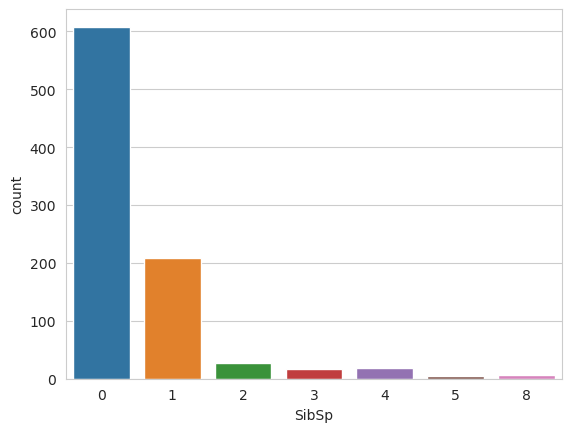

In [14]:
sns.countplot(x='SibSp', data=train)

<AxesSubplot: xlabel='Fare', ylabel='Count'>

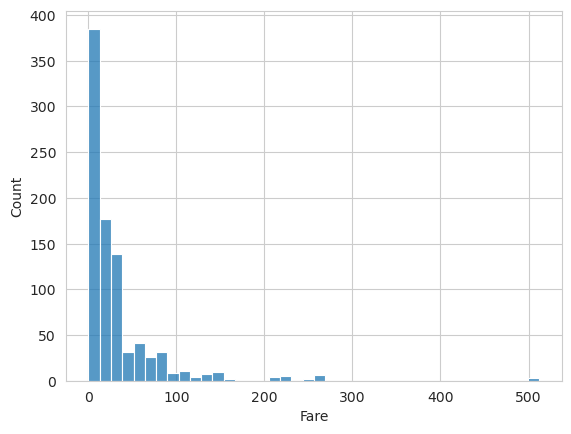

In [15]:
sns.histplot(train['Fare'], bins=40)

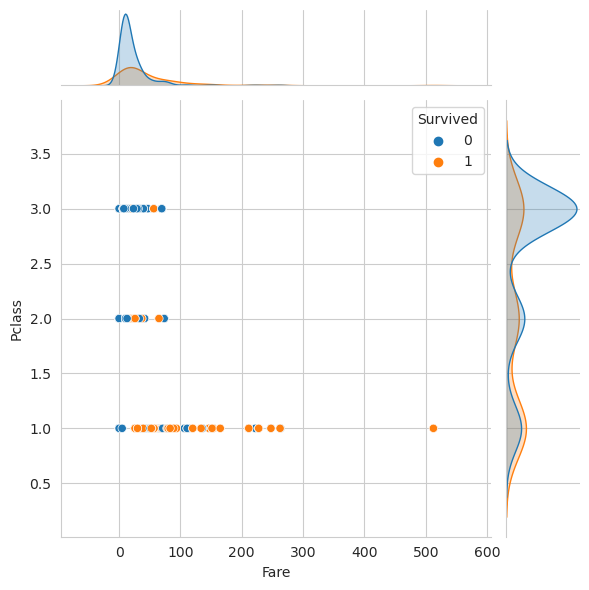

In [16]:
sns.jointplot(x='Fare', y='Pclass', hue='Survived', data=train, kind='scatter')

In [17]:
train['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [18]:
embarked_map = {'S':0, 'C':1, 'Q':2}

In [19]:
train['Embarked'] = train['Embarked'].map(embarked_map)

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0.0


In [21]:
train['Embarked'].dtype

dtype('float64')

In [22]:
train['Embarked'] = train['Embarked'].replace([np.inf, -np.inf], np.nan).fillna(0).astype(int)

In [23]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

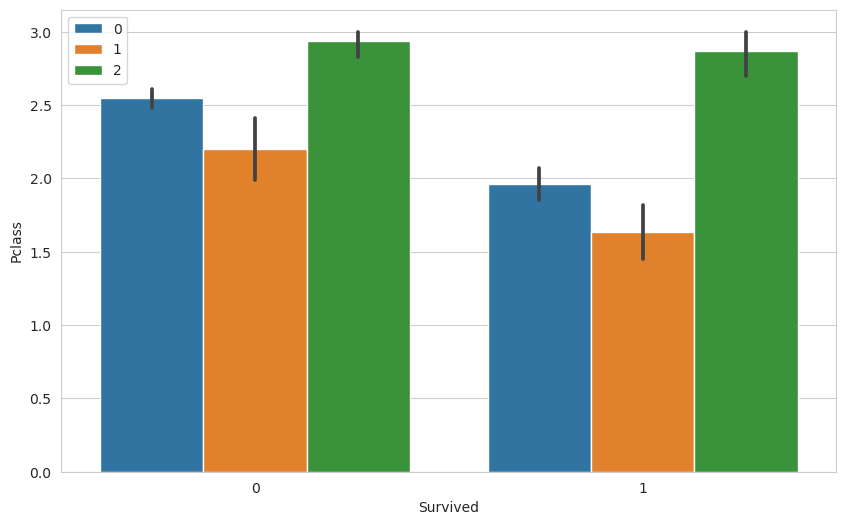

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Survived', y='Pclass', hue='Embarked', data=train)
plt.legend(loc=0)

In [25]:
import cufflinks as cf

In [26]:
cf.go_offline()

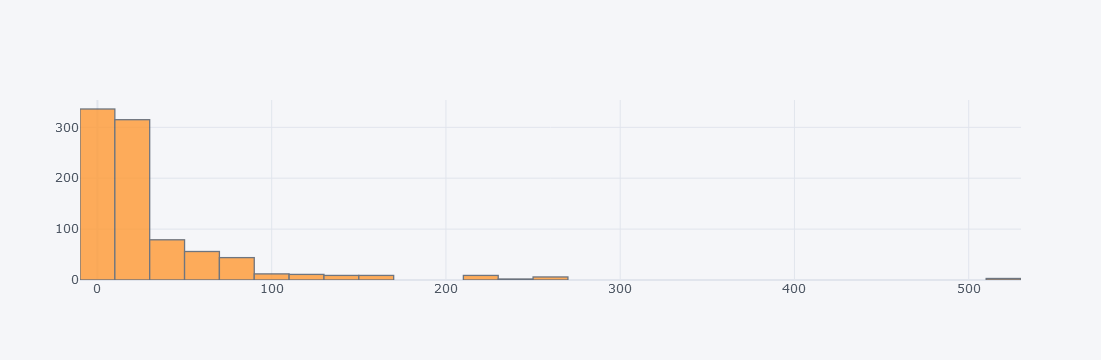

In [27]:
train['Fare'].iplot(kind='hist', bins=40)

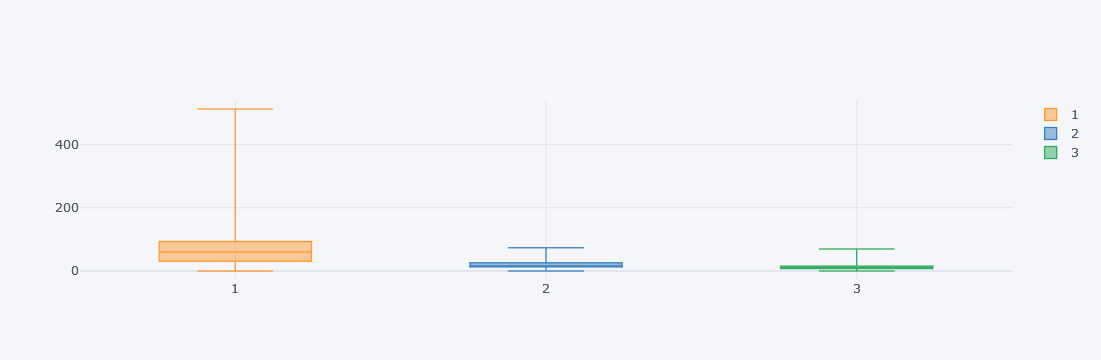

<Figure size 1000x700 with 0 Axes>

In [28]:
plt.figure(figsize=(10,7))
train[['Pclass', 'Fare']].pivot(columns='Pclass', values='Fare').iplot(kind='box')

In [29]:
def impute_age(col):
    Age = col[0]
    Pclass = col[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

<AxesSubplot: >

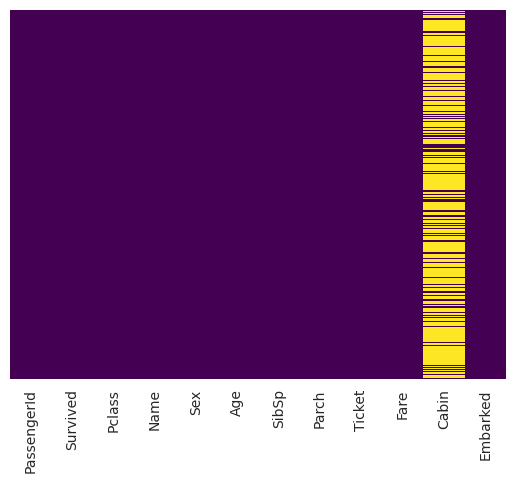

In [31]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
train.drop('Cabin', axis=1, inplace=True)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0


In [34]:
sex = pd.get_dummies(train['Sex'], drop_first=True, dtype=float)

In [35]:
sex.head()

,male
0,1.0
1,0.0
2,0.0
3,0.0
4,1.0


In [36]:
train = pd.concat([train, sex], axis=1)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,1,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,1.0


In [38]:
train.drop(['Sex', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [39]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,0,3,22.0,1,0,7.2500,0,1.0
1,1,1,38.0,1,0,71.2833,1,0.0
2,1,3,26.0,0,0,7.9250,0,0.0
3,1,1,35.0,1,0,53.1000,0,0.0
4,0,3,35.0,0,0,8.0500,0,1.0


In [40]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
logmodel = LogisticRegression()

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
parameters = {'C':[1,2,3,4,5,6,10,20,30,40,50,60], 'penalty':['l1','l2','elasticnet'], 'max_iter':[100,200,300]}

In [47]:
model = GridSearchCV(logmodel, param_grid=parameters, scoring='accuracy', cv=5)

In [48]:
model.fit(X_train, y_train)

/home/samee/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/samee/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/samee/.local/lib/python3.1

/home/samee/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/samee/.local/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/home/samee/.local/lib/python3.1

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 10, 20, 30, 40, 50, 60],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [49]:
model.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [50]:
model.best_score_

0.8186967741935482

In [51]:
predictions = model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score, classification_report

In [53]:
print(accuracy_score(y_test, predictions))

0.7835820895522388


In [54]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       154
           1       0.79      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.79      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



In [55]:
from sklearn.metrics import confusion_matrix

In [56]:
confusion_matrix(y_test, predictions)

array([[134,  20],
       [ 38,  76]])